# **Informações sobre o dataset:**

Este conjunto de dados contém informações médicas e de estilo de vida de 1500 pacientes, projetado para prever a presença de câncer com base em diversas características. O conjunto de dados é estruturado para fornecer um desafio realista para a modelagem preditiva na área médica.


<br><br>


**Age:** Valores inteiros que representam a idade do paciente, variando de 20 a 80 anos.


**Gender:** Valores binários que representam o gênero, onde 0 indica Masculino e 1 indica Feminino.


**BMI:** Valores contínuos que representam o Índice de Massa Corporal (IMC), variando de 15 a 40.


**Smoking:** Valores binários que indicam se você fuma ou não, onde 0 significa Não e 1 significa Sim.


**GeneticRisk**: Valores categóricos que representam os níveis de risco genético para câncer, sendo 0 indicativo de baixo risco, 1 de risco médio e 2 de risco alto.


**PhysicalActivity**: Valores contínuos que representam o número de horas por semana dedicadas a atividades físicas, variando de 0 a 10.


**AlcoholIntake**: Valores contínuos que representam o número de unidades de álcool consumidas por semana, variando de 0 a 5.


**CancerHistory**: Valores binários que indicam se o paciente tem histórico pessoal de câncer, onde 0 significa Não e 1 significa Sim.


**Diagnosis**: Valores binários que indicam o status do diagnóstico de câncer, onde 0 indica Sem Câncer e 1 indica Câncer.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('cancer.csv')

In [6]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


# **Análise Exploratória**

## 1. Quantas linhas e colunas possui o dataset? Existem nulos?

In [16]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


In [20]:
df.shape

(1500, 9)

#### Resposta
O dataset possui 1500 linhas e 9 colunas.

Não existem nulos.

## 2. Qual a idade mais frequente do conjunto de dados?

In [17]:
df.Age.mode()

,Age
0,52


#### Resposta
 A idade mais frequente no dataset é 52 anos

## 3. Qual a idade mais frequente dos pacientes que foram diagnosticados com câncer?

In [21]:
df[df.Diagnosis == 1].Age.mode()


,Age
0,55
1,66


#### Resposta
A idade mais frequente aos diagnosticados com câncer é 66 anos

## 4. Fumantes têm mais câncer que não fumantes?

Diagnosis,0,1
Smoking,,
0,0.695255,0.304745
1,0.448020,0.551980


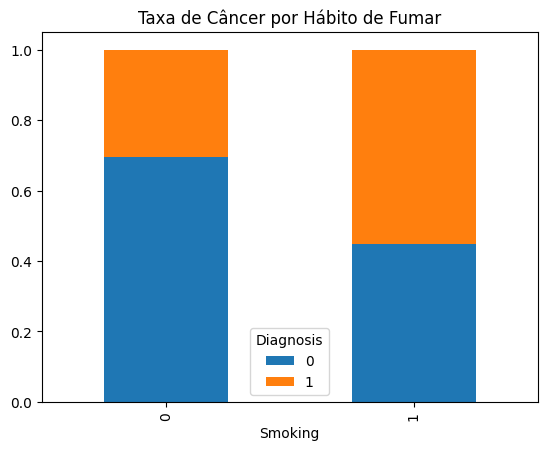

In [30]:
pd.crosstab(df['Smoking'], df['Diagnosis'])

cancer_rate_by_smoking = pd.crosstab(df['Smoking'], df['Diagnosis'], normalize='index')
cancer_rate_by_smoking.plot(kind='bar', stacked=True)
plt.title('Taxa de Câncer por Hábito de Fumar')
pd.crosstab(df['Smoking'], df['Diagnosis'], normalize='index')

#### Resposta
Analisando o gráfico, é perceptível uma relação entre o hábito de fumar e diagnósticos de câncer, onde num geral, a maioria que não fuma (~ 70%) não tem câncer, enquanto os que fumam (~ 55%) tem câncer.

## 5. Qual a proporção das classes da variável alvo? Tem mais pacientes diagnosticados com câncer ou sem câncer? As classes são desbalanceadas?

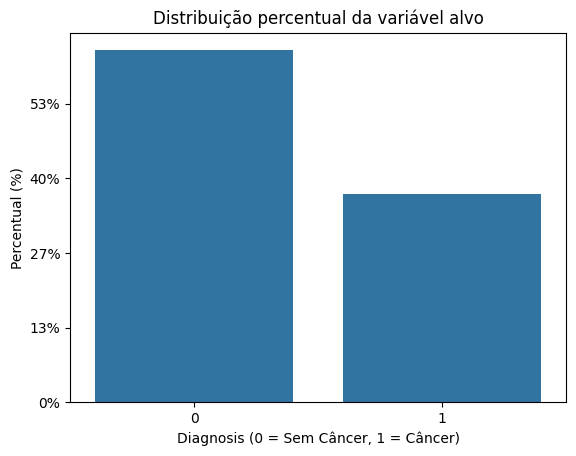

In [38]:
#df['Diagnosis'].value_counts()

#df['Diagnosis'].value_counts(normalize=True)

#sns.countplot(data=df, x='Diagnosis')
#plt.xlabel('Diagnosis (0 = Sem Câncer, 1 = Câncer)')
#plt.title('Distribuição da variável alvo')
#plt.show()

from matplotlib.ticker import PercentFormatter

ax = sns.countplot(data=df, x='Diagnosis')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=len(df)))

ax.set_xlabel('Diagnosis (0 = Sem Câncer, 1 = Câncer)')
ax.set_ylabel('Percentual (%)')
plt.title('Distribuição percentual da variável alvo')
plt.show()




#### Resposta

Podemos notar que a maioria dos dados pertence à classe 0 (sem câncer), indicando um desbalanceamento na variável alvo. Apesar disso, o desbalanceamento é leve, sendo 63% sem câncer e 37% diagnosticado.

## 6. Qual a distribuição das variáveis numéricas? Alguma delas apresenta distribuição normal? Ou todas são assimétricas?

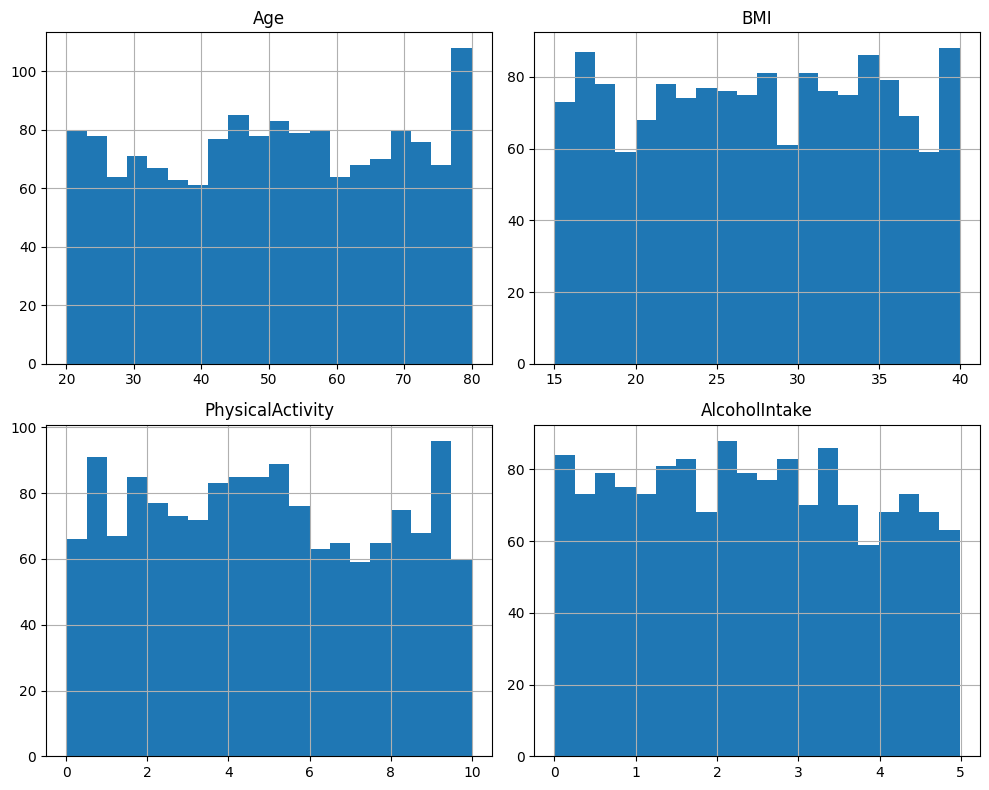

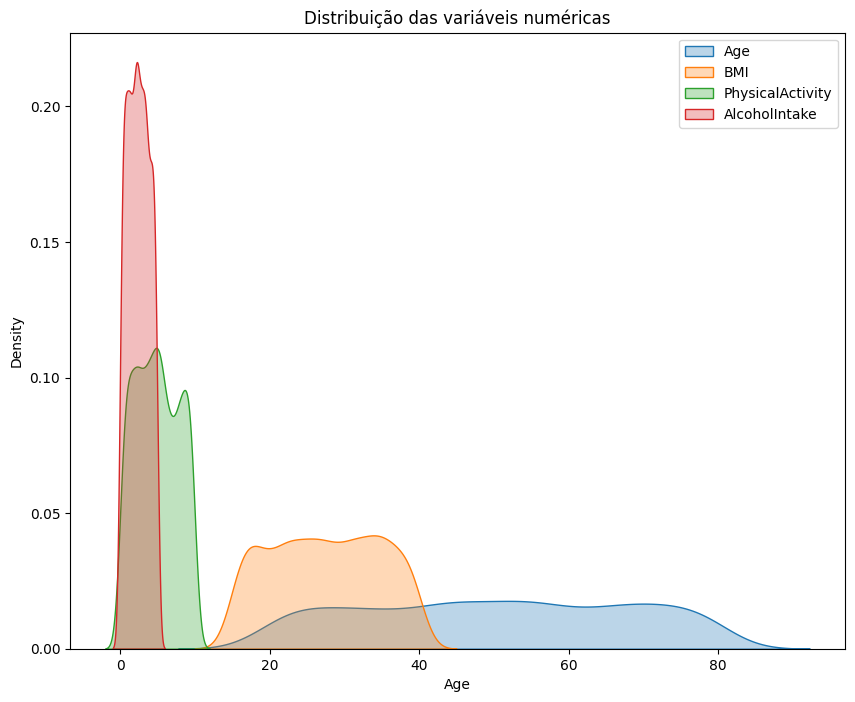

,Age,BMI,PhysicalActivity,AlcoholIntake
mean,50.320000,27.513321,4.897929,2.417987
median,51.000000,27.598494,4.834316,2.382971
skew,-0.032819,-0.021391,0.076022,0.055101


In [46]:
numeric_cols = [
    col for col in df.select_dtypes(include=['float64', 'int64']).columns
    if df[col].nunique() > 3
]

df[numeric_cols].describe()

df[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 8))
for col in numeric_cols:
    sns.kdeplot(df[col], label=col, fill=True, alpha=0.3)
plt.legend()
plt.title('Distribuição das variáveis numéricas')
plt.show()

df[numeric_cols].agg(['mean', 'median', 'skew'])

#### Resposta
Skew = 0 → distribuição mais simétrica (próxima da normal).

Skew > 0 → assimetria à direita (cauda longa para valores altos).

Skew < 0 → assimetria à esquerda.

A partir do gráfico de densidade das variáveis numéricas e a tabela com valores de média, mediana e skew, observa-se que nenhuma delas apresenta uma distribuição perfeitamente normal.

A variável Age está relativamente espalhada ao longo da faixa etária, mas com irregularidades e mais de um “pico”, o que indica que não é perfeitamente simétrica.

As variáveis BMI, PhysicalActivity e AlcoholIntake mostram distribuições claramente assimétricas à direita, com a maior parte dos pacientes concentrada em valores mais baixos e uma cauda que se estende para valores mais altos.

Assim, conclui-se que as distribuições das variáveis numéricas do dataset são predominantemente assimétricas, não seguindo o padrão de uma distribuição normal.

# ------**Construção do Modelo**--------

## 1. Divisão das variáveis em X e y

In [32]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

#### Resposta
Aqui separamos o target (Diagnosis) de nossas outras variáveis a fim de utilizá-las para prever o modelo (se o paciente tem ou não tem câncer)  



## 2. Divisão em treino e teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Resposta
Aqui são criadas as variáveis de X e y a serem treinadas e testadas para pós treino os testes serem mais precisos e acurados.

*Explicando o código...*

test_size=0.2: Define que 20% dos dados serão guardados para o teste final. Os outros 80% serão usados para treinar o modelo.

random_state=42: É  gerador de números aleatórios. Garante que, toda vez que você rodar esse código, a mistura e divisão dos dados seja exatamente a mesma.

stratify=y O stratify: força a divisão a manter essa mesma proporção tanto no treino quanto no teste. Sem isso, você poderia acabar com um teste só com pacientes saudáveis, o que falsearia a nota do modelo.



## 3. Normalização dos dados

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####Resposta
Aplicamos uma padronização nos dados para deixar todas as variáveis na mesma escala. Isso evita que variáveis com valores muito grandes dominem o modelo e garante que a regressão logística aprenda de forma equilibrada. Além disso, a padronização ajuda o algoritmo a convergir mais rápido e melhora a estabilidade e o desempenho das previsões.

*Explicando o código...*

StandardScaler coloca tudo na mesma régua (média 0, desvio padrão 1).

fit_transform(X_train): Aqui o scaler "aprende" (fit) a média e o desvio padrão dos dados de treino e já os transforma.

transform(X_test): Aqui usamos a régua que aprendemos no treino para medir o teste.

## 4. Escolha e Treinamento do Modelo

In [39]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

####Resposta
Escolhemos a regressão logística para treinar o modelo por se tratar de valores classificatórios, (com câncer = 1; sem câncer = 0). Dessa forma, permitindo um melhor encaixe a função ao invés de seguir um modelo linear.

*Explicando o código...*

LogisticRegression: Aqui estamos "instanciando" o modelo.

.fit(...):  É aqui que o computador analisa as 1200 linhas de treino, procurando padrões matemáticos que diferenciam quem tem câncer de quem não tem. Ele ajusta os pesos de cada variável.

## 5. Previsões

In [40]:
 y_pred = model.predict(X_test_scaled)

#### Resposta
Usamos o modelo treinado para gerar previsões a partir dos dados de teste já padronizados. Assim, é possível avaliar como o modelo se comporta em dados novos, que ele nunca viu, verificando se ele realmente aprendeu padrões úteis.

## 6. Avaliação das previsões

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       189
           1       0.80      0.77      0.79       111

    accuracy                           0.84       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.84      0.84       300



#### Resposta
Com base nos resultados obtidos, o modelo de regressão logística apresentou um desempenho consistente ao classificar os 300 pacientes do conjunto de teste. Para a classe 0 (pacientes sem câncer), que representa a maior parte da base — 189 casos no teste — o modelo alcançou valores elevados de desempenho: precision de 0.87, recall de 0.88 e F1-score de 0.88. Isso indica que ele acerta a maior parte das previsões de pacientes saudáveis e raramente confunde esses casos com pacientes doentes.

Para a classe 1 (pacientes com câncer), composta por 111 exemplos, o modelo apresentou métricas levemente inferiores — precision de 0.80, recall de 0.77 e F1-score de 0.79 — mas ainda adequadas para esse tipo de problema. Esses valores mostram que, entre as pessoas que o modelo classificou como tendo câncer, 80% realmente pertencem à classe positiva, e ele consegue identificar 77% de todos os doentes presentes no dataset.

No geral, a acurácia de 84% evidencia que o modelo classifica corretamente a maioria dos pacientes. Os F1-scores próximos entre as classes sugerem um desempenho equilibrado, mesmo diante de um dataset onde há mais indivíduos sem câncer do que com câncer. Em um contexto médico, esse resultado indica que o modelo pode ser útil como ferramenta inicial de triagem, ajudando a priorizar pacientes com maior probabilidade de diagnóstico positivo. **Ainda assim, melhorar o recall da classe 1 seria importante para reduzir o número de casos não detectados, aumentando a sensibilidade do modelo aos pacientes realmente doentes.**